In [1]:
# Celda 1: Cargar datos brutos
import pandas as pd

# Cargar datos originales
df_raw = pd.read_csv('../data/raw/data.csv', delimiter=';', low_memory=False)
print("📊 Dimensiones de data.csv:", df_raw.shape)
print("🔍 Columnas:", df_raw.columns.tolist())

📊 Dimensiones de data.csv: (4424, 37)
🔍 Columnas: ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rat

In [2]:
# Celda 2: Cargar datos limpios
df_cleaned = pd.read_csv('../data/processed/cleaned_data.csv')
print("📊 Dimensiones de cleaned_data.csv:", df_cleaned.shape)
print("🔍 Columnas:", df_cleaned.columns.tolist())

📊 Dimensiones de cleaned_data.csv: (4424, 37)
🔍 Columnas: ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployme

In [3]:
# Celda 3: Cargar datos procesados
X = pd.read_csv('../data/processed/X_processed.csv')
y = pd.read_csv('../data/processed/y.csv').squeeze()

# Verificar tipos de datos
print("🔢 Tipos de datos en X:")
print(X.dtypes)

# Validar que todas las columnas sean numéricas
if not X.dtypes.apply(lambda dtype: pd.api.types.is_numeric_dtype(dtype)).all():
    raise ValueError("❌ Algunas columnas no son numéricas. Revisa el preprocesamiento.")
else:
    print("✅ Todos los valores son numéricos.")

🔢 Tipos de datos en X:
0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
226    float64
227    float64
228    float64
229    float64
230    float64
Length: 231, dtype: object
✅ Todos los valores son numéricos.


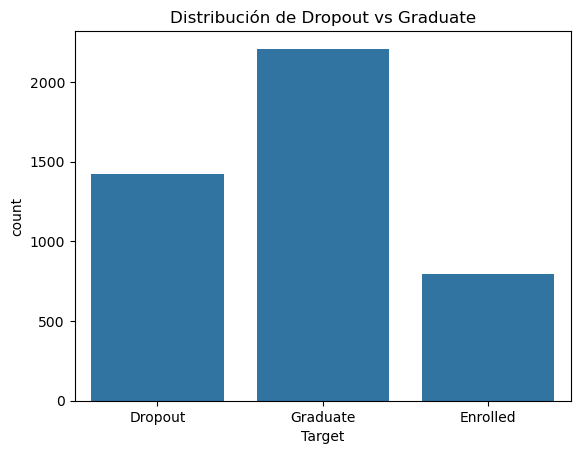

🎯 Porcentaje de clases:
Target
Graduate    49.932188
Dropout     32.120253
Enrolled    17.947559
Name: proportion, dtype: float64


In [4]:
# Celda 4: Distribución de Dropout vs Graduate
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Target', data=df_cleaned)
plt.title('Distribución de Dropout vs Graduate')
plt.show()

# Porcentaje de clases
target_counts = df_cleaned['Target'].value_counts(normalize=True) * 100
print("🎯 Porcentaje de clases:")
print(target_counts)

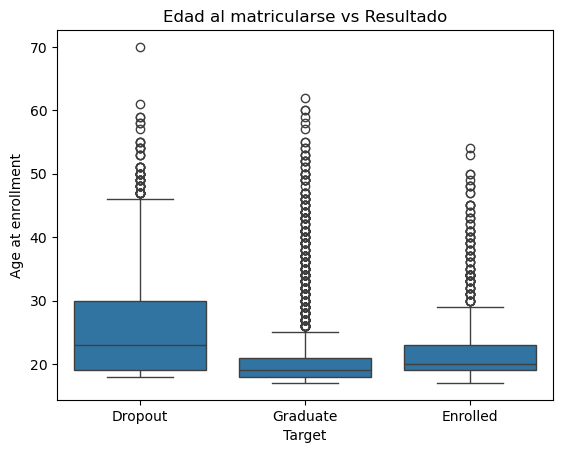

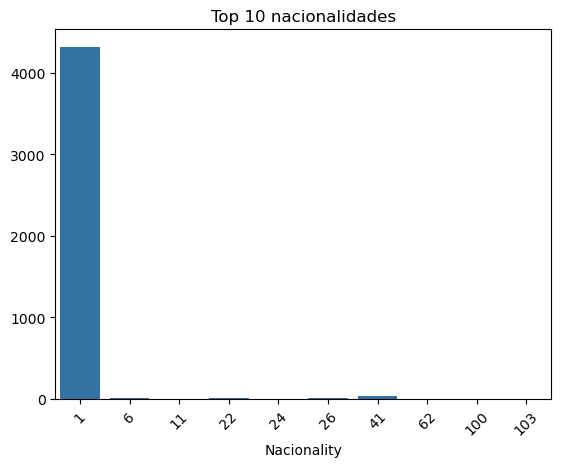

In [5]:
# Celda 5: Edad vs Target
sns.boxplot(x='Target', y='Age at enrollment', data=df_cleaned)
plt.title('Edad al matricularse vs Resultado')
plt.show()

# Nacionalidad
top_nacionalities = df_cleaned['Nacionality'].value_counts().head(10)
sns.barplot(x=top_nacionalities.index, y=top_nacionalities.values)
plt.xticks(rotation=45)
plt.title('Top 10 nacionalidades')
plt.show()

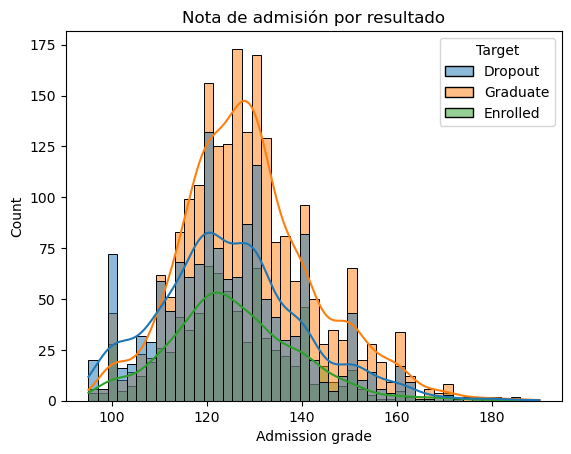

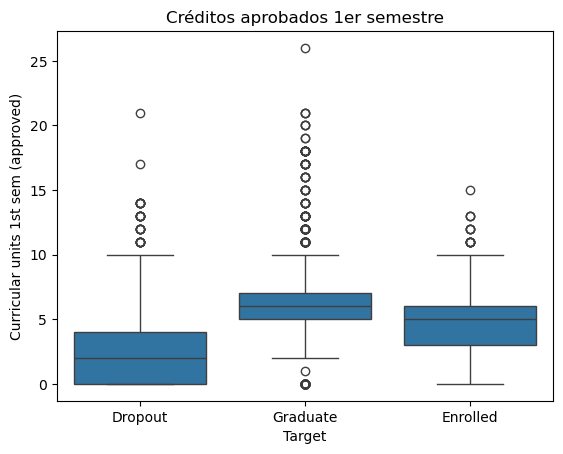

In [6]:
# Celda 6: Nota de admisión vs Target
sns.histplot(data=df_cleaned, x='Admission grade', hue='Target', kde=True)
plt.title('Nota de admisión por resultado')
plt.show()

# Créditos aprobados primer semestre
sns.boxplot(x='Target', y='Curricular units 1st sem (approved)', data=df_cleaned)
plt.title('Créditos aprobados 1er semestre')
plt.show()

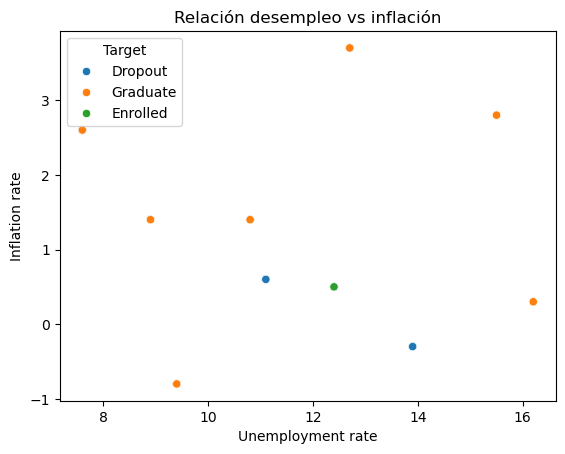

In [7]:
# Celda 7: Desempleo vs Inflación
sns.scatterplot(x='Unemployment rate', y='Inflation rate', hue='Target', data=df_cleaned)
plt.title('Relación desempleo vs inflación')
plt.show()  

In [8]:
# Celda 8: Verificar X_processed.csv
print("🔍 Primeras filas de X_processed.csv:")
print(X.head())

🔍 Primeras filas de X_processed.csv:
          0         1         2         3         4         5         6  \
0 -0.300686 -0.081917  2.436822 -4.197769  0.355850 -0.352421 -0.825034   
1 -0.300686 -0.197149 -0.562471  0.193388  0.355850 -0.352421  2.045805   
2 -0.300686 -1.003777  2.436822  0.104434  0.355850 -0.352421 -0.825034   
3 -0.300686 -0.081917  0.187353  0.444298  0.355850 -0.352421 -0.825034   
4  1.330837  1.185642 -0.562471 -0.406087 -2.810171 -0.352421 -2.487099   

          7         8         9  ...  221  222  223  224  225  226  227  228  \
0 -0.124214 -0.063288 -0.692162  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1 -0.124214 -1.218383 -1.281423  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2 -0.124214  1.091807  0.944677  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3 -0.124214  1.155979  0.944677  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4 -0.124214  1.091807  1.010150  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   229  230  
0  0.0  0.0  
1  

In [9]:
# Celda 9: Solución temporal si X_processed.csv tiene valores no numéricos
import numpy as np

# Convertir cadenas a matrices densas (solo si hay errores)
def parse_sparse_matrix(row):
    try:
        # Si ya es numérico, devolver tal cual
        if pd.api.types.is_numeric_dtype(row):
            return row
        # Si es cadena de matriz dispersa, convertir a array
        row = row.strip().replace('(', '').replace(')', '').replace('\t', ', ')
        coords = [tuple(map(int, item.split(','))) for item in row.split()]
        arr = np.zeros(X.shape[1])
        for idx, value in coords:
            arr[idx] = value
        return pd.Series(arr)
    except Exception as e:
        return pd.Series(np.nan * np.ones(X.shape[1]))

# Aplicar conversión (solo si hay errores)
X_fixed = X.apply(parse_sparse_matrix, axis=1)
X_fixed.to_csv('../data/processed/X_processed_fixed.csv', index=False)
print("✅ Datos corregidos guardados en X_processed_fixed.csv")

✅ Datos corregidos guardados en X_processed_fixed.csv


In [10]:
jupyter nbconvert --to html notebooks/01_EDA.ipynb --output reports/EDA_Report.html

SyntaxError: invalid syntax (2398001782.py, line 1)